In [8]:
import pandas as p
from pandas import Series,DataFrame
import numpy as n

In [9]:
import matplotlib.pyplot as plt
import seaborn as s
s.set_style('whitegrid')
%matplotlib inline

In [10]:
import pandas_datareader.data as web

In [11]:
from datetime import datetime

In [12]:
from __future__ import division

In [13]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOLD','BTC']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = web.DataReader(stock,'yahoo',start,end)
    

In [14]:
GOLD.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,21.454020,20.951717,21.236640,21.188360,1.736849e+07,20.636245
std,1.844313,1.801392,1.838748,1.830065,6.017467e+06,1.648600
min,18.080000,17.559999,17.690001,17.580000,4.920100e+06,17.371363
25%,20.010000,19.520000,19.820000,19.790001,1.312140e+07,19.345566
50%,21.160000,20.690001,20.920000,20.879999,1.611250e+07,20.378204
75%,23.110001,22.559999,22.900000,22.780001,2.023260e+07,21.991777
max,25.370001,24.610001,25.230000,25.270000,4.104470e+07,24.455353


In [15]:
BTC.describe()


,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,99.266670,99.229884,99.252592,99.247174,2851.111111,99.247174
std,0.488795,0.484498,0.492266,0.479061,23856.857980,0.479061
min,98.172501,98.172501,98.172501,98.172501,0.000000,98.172501
25%,98.907578,98.833998,98.887499,98.858751,1.000000,98.858751
50%,99.110001,99.110001,99.110001,99.110001,97.000000,99.110001
75%,99.708023,99.680000,99.696249,99.686249,885.250000,99.686249
max,100.889999,100.154999,100.889999,100.154999,354054.000000,100.154999


In [16]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,138.369230,135.620434,136.966641,137.073914,9.009793e+07,136.630441
std,11.121279,11.104793,11.024648,11.169121,2.863489e+07,11.333113
min,120.400002,116.209999,119.029999,116.360001,4.100000e+07,115.819870
25%,128.320007,126.120003,127.410004,127.139999,6.990710e+07,126.754814
50%,136.009995,133.589996,135.020004,134.779999,8.567190e+07,134.094650
75%,148.039993,145.759995,146.649994,146.800003,1.049116e+08,146.486206
max,170.294998,166.050003,167.479996,168.150101,1.925415e+08,168.150101


In [17]:
# General Info
AAPL.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-12-01 to 2021-12-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


<AxesSubplot:xlabel='Date'>

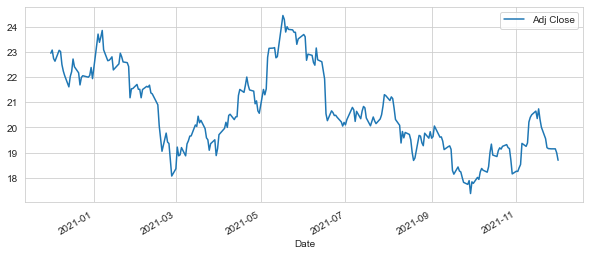

In [18]:
# Let's see a historical view of the closing price
GOLD['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

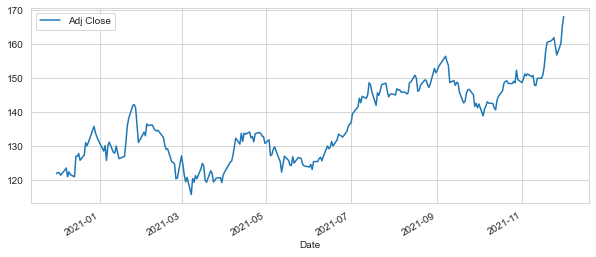

In [19]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

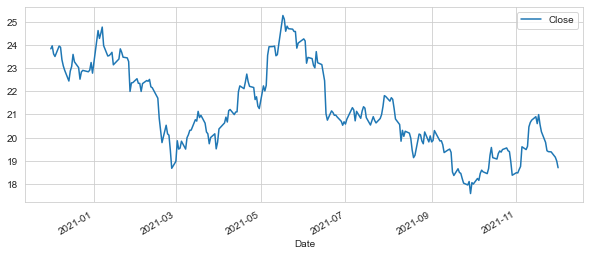

In [20]:
GOLD['Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

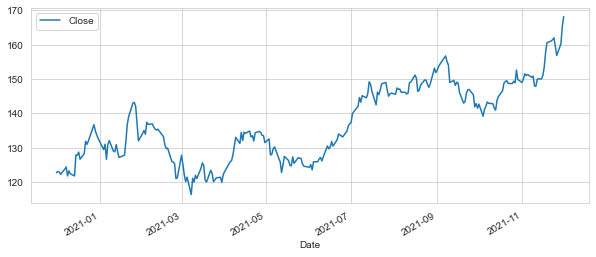

In [21]:
AAPL['Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

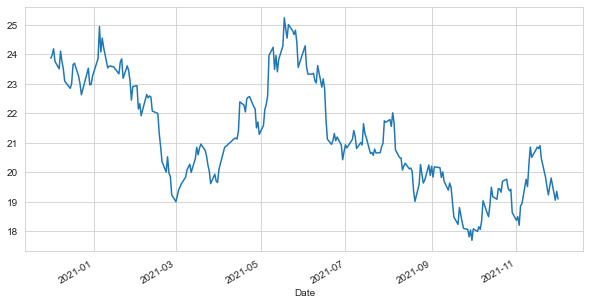

In [22]:
GOLD['Open'].plot(legend=False,figsize=(10,5))

<AxesSubplot:xlabel='Date'>

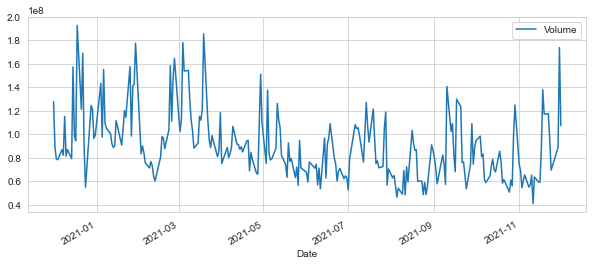

In [23]:
# Now let's plot the total volume of stock being traded each day over the past 5 years
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [24]:
myday=[20,30,60]

In [25]:
for ma in myday:
    col_N ="MA for %s days" %[str(ma)]
    GOLD[col_N]=(GOLD['Adj Close']).rolling(ma).mean()
    
    

In [26]:
GOLD[['Adj Close','MA for 20 days','MA for 30 days','MA for 60 days']].plot(Subplots=True,figsize=(5,2))

KeyError: "['MA for 30 days', 'MA for 60 days', 'MA for 20 days'] not in index"

<AxesSubplot:xlabel='Date'>

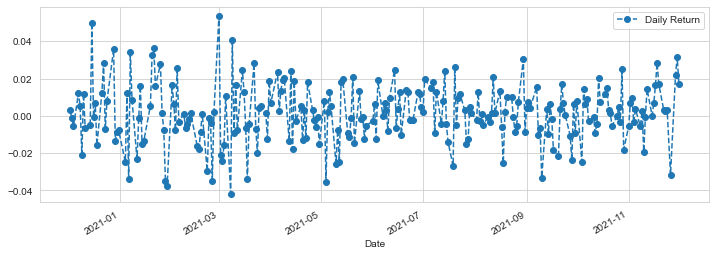

In [27]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

<AxesSubplot:xlabel='Date'>

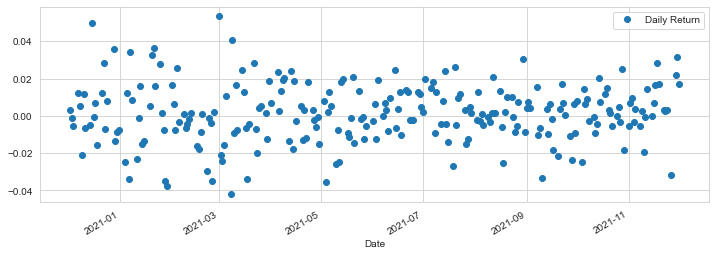

In [28]:
# We'll use pct_change to find the percent change for each day
GOLD['Daily Return'] = AAPL['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
GOLD['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='',marker='o')

In [ ]:
GOLD['Daily Return'].hist(bins=50)

In [ ]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
s.distplot(GOLD['Daily Return'].dropna(),bins=100,color='green')

# Could have also done:
#AAPL['Daily Return'].hist()

In [29]:
clsingdf=web.DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [30]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = web.DataReader(['AAPL','BTC','GOLD'],'yahoo',start,end)['Adj Close']

In [31]:
closing_df.head()

Symbols,AAPL,BTC,GOLD
Date,,,
2020-12-01,121.968094,99.900597,22.955061
2020-12-02,122.325890,99.875000,23.080288
2020-12-03,122.186745,99.974998,22.743141
2020-12-04,121.500977,99.860802,22.637180
2020-12-07,122.991791,99.955002,23.070658


In [32]:
clsingdf.head()

Symbols,AAPL,GOLD,BTC
Date,,,
2020-12-01,121.968102,22.955063,99.900597
2020-12-02,122.325890,23.080288,99.875000
2020-12-03,122.186752,22.743139,99.974998
2020-12-04,121.500969,22.637180,99.860802
2020-12-07,122.991776,23.070658,99.955002


In [33]:
clsingdf.tail()

Symbols,AAPL,GOLD,BTC
Date,,,
2021-11-24,161.940002,19.159882,98.184998
2021-11-26,156.809998,19.150000,98.547997
2021-11-29,160.240005,19.150000,98.565002
2021-11-30,165.300003,18.990000,98.640503
2021-12-01,168.009995,18.681700,NaN


In [34]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

C:\Users\TAKIM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


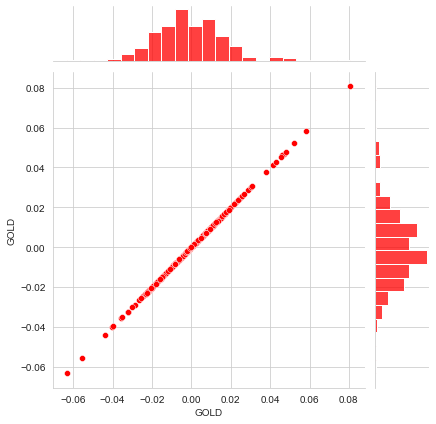

In [35]:
# Comparing Google to itself should show a perfectly linear relationship
s.jointplot("GOLD","GOLD",tech_rets,kind='scatter',color='red')

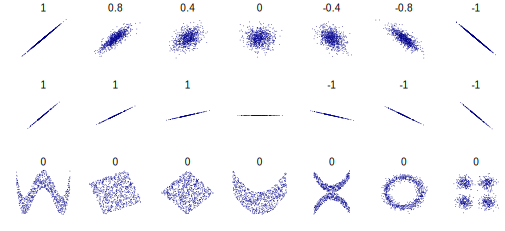

In [36]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')


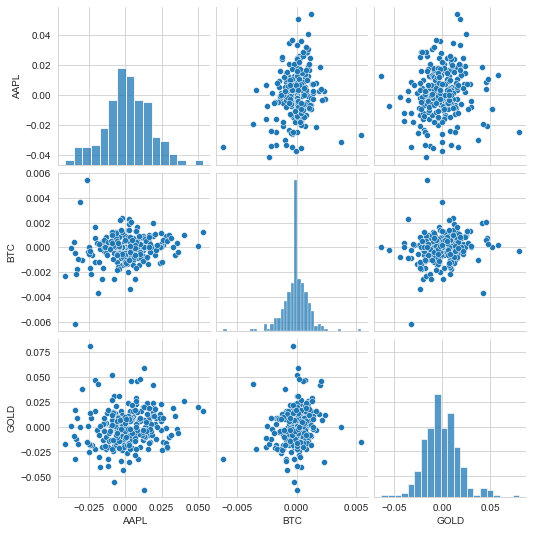

In [37]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
s.pairplot(tech_rets.dropna())

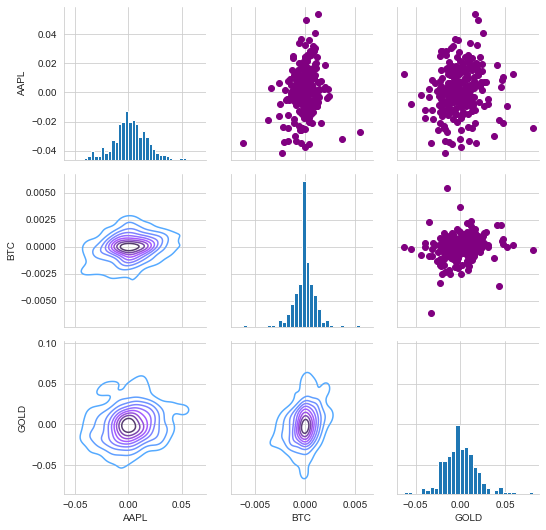

In [53]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = s.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(s.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

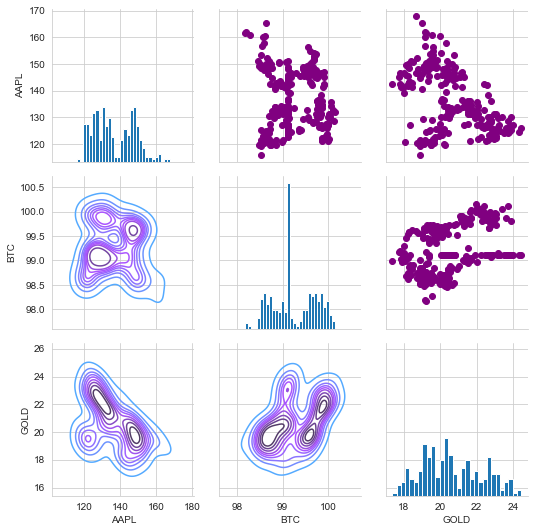

In [39]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = s.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(s.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

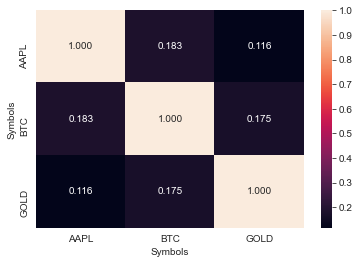

In [40]:
tech_rets_corr= tech_rets.dropna().corr()
s.heatmap(tech_rets_corr, annot=True, fmt='.3f')
plt.show()